# **Intro to pandas**

## Basic Concepts

The following line imports the *pandas* API and prints the API version:

In [ ]:
## import the libraries for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
## check the version of pandas
pd.__version__

'1.5.3'

The primary data structures in *pandas* are implemented as two classes:

  * **`DataFrame`**, which you can imagine as a relational data table, with rows and named columns.
  * **`Series`**, which is a single column. A `DataFrame` contains one or more `Series` and a name for each `Series`.

The data frame is a commonly used abstraction for data manipulation. Similar implementations exist in [Spark](https://spark.apache.org/) and [R](https://www.r-project.org/about.html).

One way to create a `Series` is to construct a `Series` object. For example:

In [ ]:
## a list of cities
['San Francisco', 'San Jose', 'Sacramento']

['San Francisco', 'San Jose', 'Sacramento']

In [ ]:
## series of cities
pd.Series(['San Francisco', 'San Jose', 'Sacramento'])

0    San Francisco
1         San Jose
2       Sacramento
dtype: object

`DataFrame` objects can be created by passing a `dict` mapping `string` column names to their respective `Series`. If the `Series` don't match in length, missing values are filled with special [NA/NaN](http://pandas.pydata.org/pandas-docs/stable/missing_data.html) values. Example:

In [ ]:
## generating two pandas serieses
city_names = pd.Series(['San Francisco', 'San Jose', 'Sacramento'])
population = pd.Series([852469, 1015785, 485199])

In [ ]:
{'city_names':city_names, 'Populaton':population}

{'city_names': 0    San Francisco
 1         San Jose
 2       Sacramento
 dtype: object,
 'Populaton': 0     852469
 1    1015785
 2     485199
 dtype: int64}

In [ ]:
pd.DataFrame({ 'City name': city_names, 'Population': population })

,City name,Population
0,San Francisco,852469
1,San Jose,1015785
2,Sacramento,485199


But most of the time, you load an entire file into a `DataFrame`. The following example loads a file with California housing data. Run the following cell to load the data and create feature definitions:

In [ ]:
## read in the data from the url using pandas 'read_csv'
cal_hous_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv", sep=",")

The example above used `DataFrame.describe` to show interesting statistics about a `DataFrame`. Another useful function is `DataFrame.head`, which displays the first few records of a `DataFrame`:

In [ ]:
## display the first five rows
cal_hous_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
cal_hous_df['pop_1000'] =cal_hous_df['population']/1000

In [ ]:
cal_hous_df['log_price'] = np.log(cal_hous_df['housing_median_age'])

array([[<Axes: title={'center': 'median_house_value'}>]], dtype=object)

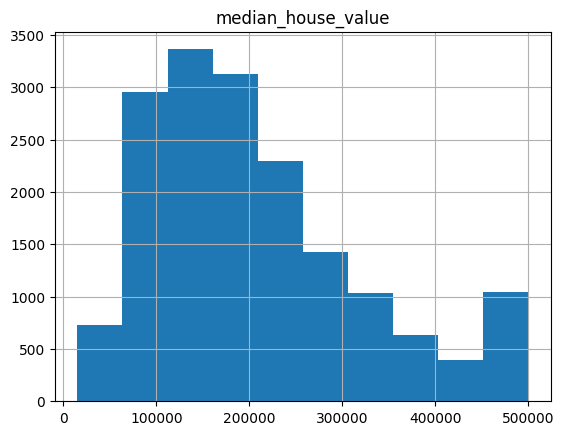

In [ ]:
cal_hous_df.hist(['median_house_value'])

array([[<Axes: title={'center': 'log_price'}>]], dtype=object)

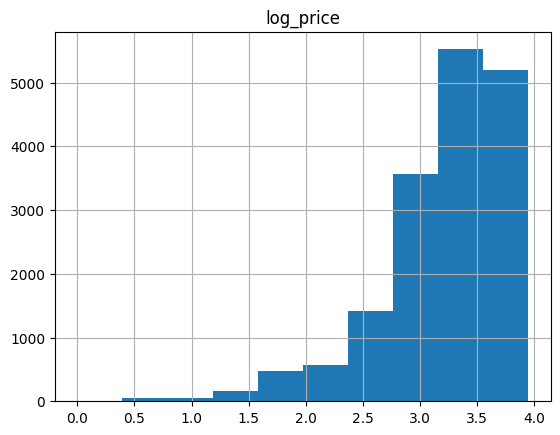

In [ ]:
cal_hous_df.hist(['log_price'])

In [ ]:
## look a the types of data
cal_hous_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
 9   pop_1000            17000 non-null  float64
 10  log_price           17000 non-null  float64
dtypes: float64(11)
memory usage: 1.4 MB


In [ ]:
cal_hous_df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
pop_1000              0
log_price             0
dtype: int64

In [ ]:
## the basic statistics for numerical columns in the dataset
cal_hous_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
longitude,17000.0,-119.562108,2.005166,-124.3500,-121.790000,-118.490000,-118.000000,-114.310000
latitude,17000.0,35.625225,2.137340,32.5400,33.930000,34.250000,37.720000,41.950000
housing_median_age,17000.0,28.589353,12.586937,1.0000,18.000000,29.000000,37.000000,52.000000
total_rooms,17000.0,2643.664412,2179.947071,2.0000,1462.000000,2127.000000,3151.250000,37937.000000
total_bedrooms,17000.0,539.410824,421.499452,1.0000,297.000000,434.000000,648.250000,6445.000000
population,17000.0,1429.573941,1147.852959,3.0000,790.000000,1167.000000,1721.000000,35682.000000
households,17000.0,501.221941,384.520841,1.0000,282.000000,409.000000,605.250000,6082.000000
median_income,17000.0,3.883578,1.908157,0.4999,2.566375,3.544600,4.767000,15.000100
median_house_value,17000.0,207300.912353,115983.764387,14999.0000,119400.000000,180400.000000,265000.000000,500001.000000
pop_1000,17000.0,1.429574,1.147853,0.0030,0.790000,1.167000,1.721000,35.682000


Another powerful feature of *pandas* is graphing. For example, `DataFrame.hist` lets you quickly study the distribution of values in a column:

array([[<Axes: title={'center': 'housing_median_age'}>]], dtype=object)

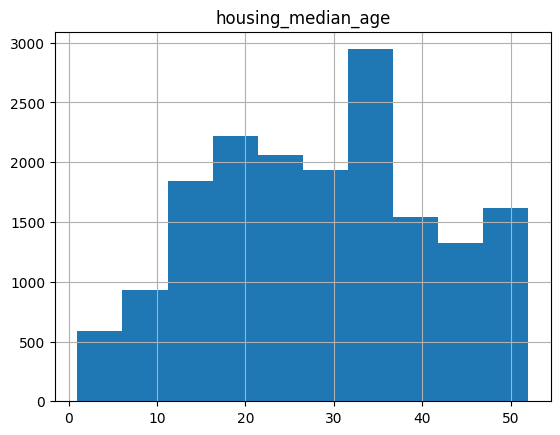

In [ ]:
## generate a histgram for the housing_median_age' column
cal_hous_df.hist('housing_median_age')

In [ ]:
cal_hous_df['housing_median_age'].value_counts().sort_values(ascending=False)[:5]

52.0    1052
36.0     715
35.0     692
16.0     635
17.0     576
34.0     567
33.0     513
26.0     503
18.0     478
25.0     461
32.0     458
37.0     437
15.0     416
19.0     412
28.0     400
27.0     397
24.0     389
31.0     384
30.0     384
20.0     383
23.0     382
29.0     374
21.0     373
14.0     347
22.0     323
38.0     318
42.0     308
39.0     302
44.0     296
43.0     286
13.0     249
40.0     249
45.0     235
41.0     232
10.0     226
11.0     208
5.0      199
Name: housing_median_age, dtype: int64

## Accessing Data

You can access `DataFrame` data using familiar Python dict/list operations:

In [ ]:
cities = pd.DataFrame({ 'City name': city_names, 'Population': population })
print(type(cities['City name']))
cities['City name']

<class 'pandas.core.series.Series'>


0    San Francisco
1         San Jose
2       Sacramento
Name: City name, dtype: object

In [ ]:
cities

,City name,Population
0,San Francisco,852469
1,San Jose,1015785
2,Sacramento,485199


In [ ]:
print(type(cities['City name'][1]))
cities['City name'][1]

<class 'str'>


'San Jose'

In [ ]:
print(type(cities[0:2]))
cities[0:2]

<class 'pandas.core.frame.DataFrame'>


,City name,Population
0,San Francisco,852469
1,San Jose,1015785


In addition, *pandas* provides an extremely rich API for advanced [indexing and selection](http://pandas.pydata.org/pandas-docs/stable/indexing.html) that is too extensive to be covered here.

## Manipulating Data

You may apply Python's basic arithmetic operations to `Series`. For example:

In [ ]:

population / 1000.

0     852.469
1    1015.785
2     485.199
dtype: float64

NumPyis a popular toolkit for scientific computing. *pandas* `Series` can be used as arguments to most NumPy functions:

In [ ]:
import numpy as np

np.log(population)

0    13.655892
1    13.831172
2    13.092314
dtype: float64

For more complex single-column transformations, you can use `Series.apply`. Like the Python

The example below creates a new `Series` that indicates whether `population` is over one million:

In [ ]:
population.apply(lambda val: val > 1000000)

0    False
1     True
2    False
dtype: bool


Modifying `DataFrames` is also straightforward. For example, the following code adds two `Series` to an existing `DataFrame`:

In [ ]:
cities['Area square miles'] = pd.Series([46.87, 176.53, 97.92])
cities['Population density'] = cities['Population'] / cities['Area square miles']
cities

,City name,Population,Area square miles,Population density
0,San Francisco,852469,46.87,18187.945381
1,San Jose,1015785,176.53,5754.177760
2,Sacramento,485199,97.92,4955.055147


## Exercise #1

Modify the `cities` table by adding a new boolean column that is True if and only if *both* of the following are True:

  * The city is named after a saint.
  * The city has an area greater than 50 square miles.

**Note:** Boolean `Series` are combined using the bitwise, rather than the traditional boolean, operators. For example, when performing *logical and*, use `&` instead of `and`.


In [ ]:
cities['Is wide and has saint name'] = (cities['Area square miles'] > 50) & cities['City name'].apply(lambda name: name.startswith('San'))
cities

,City name,Population,Area square miles,Population density,Is wide and has saint name
0,San Francisco,852469,46.87,18187.945381,False
1,San Jose,1015785,176.53,5754.177760,True
2,Sacramento,485199,97.92,4955.055147,False


## Indexes
Both `Series` and `DataFrame` objects also define an `index` property that assigns an identifier value to each `Series` item or `DataFrame` row.

By default, at construction, *pandas* assigns index values that reflect the ordering of the source data. Once created, the index values are stable; that is, they do not change when data is reordered.

In [ ]:
city_names.index

RangeIndex(start=0, stop=3, step=1)

In [ ]:
cities.index

RangeIndex(start=0, stop=3, step=1)

Call `DataFrame.reindex` to manually reorder the rows. For example, the following has the same effect as sorting by city name:

In [ ]:
cities.reindex([2, 0, 1])

,City name,Population,Area square miles,Population density,Is wide and has saint name
2,Sacramento,485199,97.92,4955.055147,False
0,San Francisco,852469,46.87,18187.945381,False
1,San Jose,1015785,176.53,5754.177760,True


Reindexing is a great way to shuffle (randomize) a `DataFrame`. In the example below, we take the index, which is array-like, and pass it to NumPy's `random.permutation` function, which shuffles its values in place. Calling `reindex` with this shuffled array causes the `DataFrame` rows to be shuffled in the same way.
Try running the following cell multiple times!

In [ ]:
cities.reindex(np.random.permutation(cities.index))

,City name,Population,Area square miles,Population density,Is wide and has saint name
1,San Jose,1015785,176.53,5754.177760,True
2,Sacramento,485199,97.92,4955.055147,False
0,San Francisco,852469,46.87,18187.945381,False


## Exercise #2

The `reindex` method allows index values that are not in the original `DataFrame`'s index values. Try it and see what happens if you use such values! Why do you think this is allowed?

In [ ]:
# Your code here

### Solution

Click below for the solution.

If your `reindex` input array includes values not in the original `DataFrame` index values, `reindex` will add new rows for these "missing" indices and populate all corresponding columns with `NaN` values:

In [ ]:
cities.reindex([0, 4, 5, 2])

,City name,Population,Area square miles,Population density,Is wide and has saint name
0,San Francisco,852469.0,46.87,18187.945381,False
4,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN
2,Sacramento,485199.0,97.92,4955.055147,False


## **Home Work**

1. Are there any highly corelated variables/columns?
(hint generate  correlation matrix and heatmap for the dataframe)


yes there are, the values close to 1 indicates a strong positive corelation, the values close to -1 indicates a strong negative corelation and the values close to 0 indicates a weak or nul corelation.

In [ ]:
corr_mat = cities.corr().round(2)
corr_mat

<ipython-input-40-d020449b2167>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = cities.corr().round(2)


,Population,Area square miles,Population density,Is wide and has saint name
Population,1.00,0.41,0.27,0.74
Area square miles,0.41,1.00,-0.77,0.92
Population density,0.27,-0.77,1.00,-0.45
Is wide and has saint name,0.74,0.92,-0.45,1.00


<Axes: >

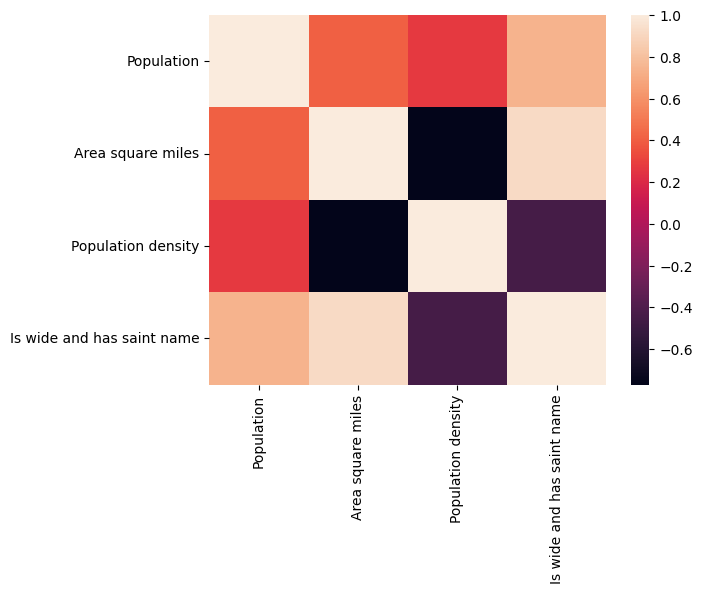

In [ ]:
sns.heatmap(corr_mat)